In [1]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [2]:
%%R
install.packages("psych")
library(psych)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘tmvnsim’, ‘mnormt’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tmvnsim_1.0-2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 6052 bytes

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

# Data

In [3]:
%%R
dat = read.csv('dave_final.csv')

In [5]:
%%R
head(dat)

  X PINST1 PINST2 PINST3 PINST4 PSOCP1 PSOCP2 PTRANS1 PTRANS2 PTRANS3 PMSC1
1 0      4      4      5      5      3      4       5       5       5     4
2 1      3      4      1      4      4      4       3       2       3     4
3 2      4      4      5      4      4      5       5       5       5     3
4 3      4      4      5      5      5      4       5       5       5     2
5 4      4      4      4      4      4      5       5       5       4     2
6 5      3      4      4      4      4      4       5       5       5     4
  PMSC2 PMSC3 PINST11 PINST22 PINST33 PINST44 PSOCP11 PSOCP22 PTRANS11 PTRANS22
1     5     5       4       5       5       5       3       4        5        5
2     3     5       4       4       5       4       4       4        3        2
3     5     5       5       5       5       5       4       5        5        5
4     5     5       4       5       5       5       5       4        5        5
5     4     4       5       5       5       4       4       5       

### Describing Data

In [6]:
%%R
des = describe(dat)
knitr::kable(des[,c("min", "max", "mean", "median", "skew", "kurtosis")], main = "Data Summary")



|                      | min| max|   mean| median|       skew|   kurtosis|
|:---------------------|---:|---:|------:|------:|----------:|----------:|
|X                     |   0| 199| 99.500|   99.5|  0.0000000| -1.2180144|
|PINST1                |   3|   5|  3.905|    4.0| -0.9349855|  2.9028276|
|PINST2                |   4|   5|  4.110|    4.0|  2.4742175|  4.1425399|
|PINST3                |   1|   5|  4.025|    4.0| -2.1240773|  5.0481887|
|PINST4                |   4|   5|  4.215|    4.0|  1.3770681| -0.1041292|
|PSOCP1                |   3|   5|  4.020|    4.0|  0.0122015|  0.2991898|
|PSOCP2                |   2|   5|  4.105|    4.0| -1.2951899|  3.3529635|
|PTRANS1               |   3|   5|  4.740|    5.0| -2.0879107|  3.1049499|
|PTRANS2               |   2|   5|  4.610|    5.0| -2.3080482|  4.5266522|
|PTRANS3               |   3|   5|  4.410|    5.0| -0.7466378| -0.6620062|
|PMSC1                 |   1|   4|  2.730|    3.0|  0.0711871| -1.0034279|
|PMSC2                 

### Drop index column, profits column, and age column. 

Profits and age are continuous variables, and they are causing problems in the calculation of the polychoric correlation which is desirable for categorical data. So I drop them. 

In [7]:
%%R
dat2 <- dat[-c(1, 27,26)]

In [8]:
%%R
head(dat2)

  PINST1 PINST2 PINST3 PINST4 PSOCP1 PSOCP2 PTRANS1 PTRANS2 PTRANS3 PMSC1 PMSC2
1      4      4      5      5      3      4       5       5       5     4     5
2      3      4      1      4      4      4       3       2       3     4     3
3      4      4      5      4      4      5       5       5       5     3     5
4      4      4      5      5      5      4       5       5       5     2     5
5      4      4      4      4      4      5       5       5       4     2     4
6      3      4      4      4      4      4       5       5       5     4     5
  PMSC3 PINST11 PINST22 PINST33 PINST44 PSOCP11 PSOCP22 PTRANS11 PTRANS22
1     5       4       5       5       5       3       4        5        5
2     5       4       4       5       4       4       4        3        2
3     5       5       5       5       5       4       5        5        5
4     5       4       5       5       5       5       4        5        5
5     4       5       5       5       4       4       5        5      

In [9]:
%%R
dat = dat2
features = dat[1:24]

## Polychoric correlation

Polychoric correlation is desirable for factor analysis with categorical variables

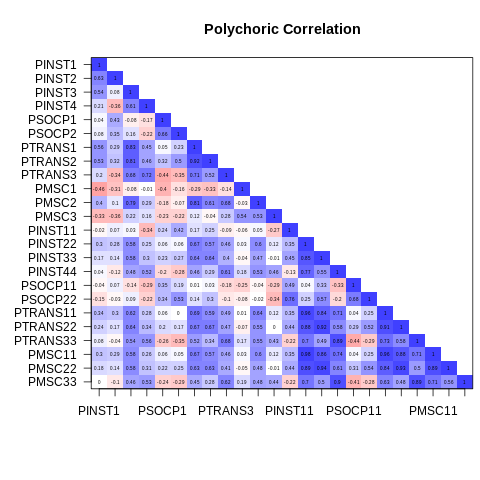

In [10]:
%%R
## Polychoric correlation
poly_cor = polychoric(features)
rho = poly_cor$rho
save(rho, file = "polychoric")
### Thresholds/Scaling results
#poly_cor$tau
cor.plot(poly_cor$rho, numbers=T, upper=FALSE, main = "Polychoric Correlation", show.legend = FALSE)

Comparison with Pearson correlation

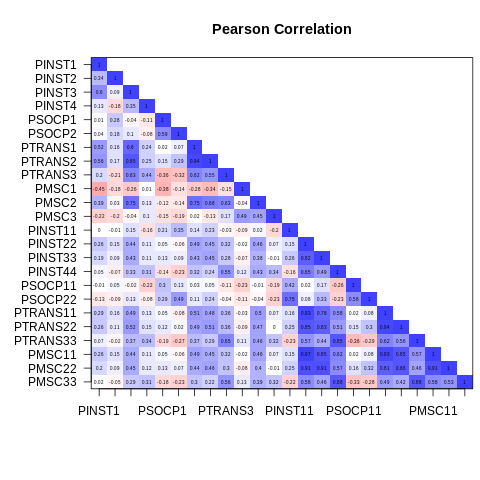

In [11]:
%%R
## Pearson Correlation
pear_cor = cor(features)
cor.plot(pear_cor, numbers=T, upper=FALSE, main = "Pearson Correlation", show.legend = FALSE)

Factor selection with polychoric correlation. The optimal number of factors selected is 4. In other words, only 4 factors have eigen values more than 1.

Parallel analysis suggests that the number of factors =  4  and the number of components =  NA 


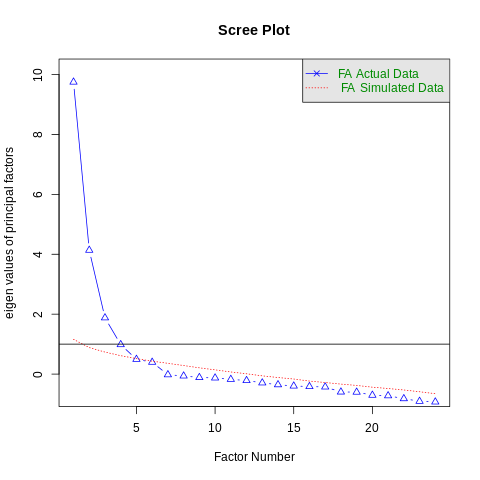

In [12]:
%%R
load("polychoric")
# Scree plot
fa.parallel(rho, fm="pa", fa="fa", main = "Scree Plot")

Factor loadings for identifying which variables load to which factors (i.e, ML1, ML2, ML3, ML4). For example, PINST1 positively loads to factor ML1. Relevant variables for each factor should have factor loading score above 0.5 or below -0.5. The rest of the variables that do not load to any factor should be eliminated. 

In [13]:
%%R
# Model with default features
poly_model = fa(features, nfactor=4, cor="poly", fm="mle", rotate = "none")
save(poly_model, file = "poly_model")
poly_model$loadings

R[write to console]: In factor.scores, the correlation matrix is singular, an approximation is used




Loadings:
         ML2    ML1    ML3    ML4   
PINST1   -0.118  0.649 -0.202  0.412
PINST2   -0.452  0.889              
PINST3    0.591  0.394 -0.166  0.503
PINST4    0.573 -0.109 -0.397  0.375
PSOCP1   -0.207  0.386  0.410       
PSOCP2   -0.113  0.341  0.560  0.272
PTRANS1   0.529  0.599 -0.127  0.558
PTRANS2   0.439  0.593         0.604
PTRANS3   0.743        -0.375  0.438
PMSC1     0.165 -0.271 -0.105 -0.410
PMSC2     0.546  0.395 -0.272  0.374
PMSC3     0.346 -0.234 -0.444       
PINST11   0.274  0.226  0.695       
PINST22   0.694  0.669        -0.200
PINST33   0.738  0.535  0.287       
PINST44   0.741  0.236 -0.503 -0.247
PSOCP11          0.105  0.718       
PSOCP22   0.320  0.136  0.925       
PTRANS11  0.676  0.677        -0.138
PTRANS22  0.743  0.567  0.221       
PTRANS33  0.666  0.282 -0.586 -0.124
PMSC11    0.693  0.671        -0.194
PMSC22    0.753  0.542  0.245       
PMSC33    0.683  0.221 -0.566 -0.217

                 ML2   ML1   ML3   ML4
SS loadings    7.145 5.1

Eigen values of the common factors. Here, there only 4 eigen values greater than 1, suggesting 4 optimal factors for the dataset. Same results as the screen plot above.

In [14]:
%%R
poly_model$values 

 [1]  9.98044628  4.63203157  2.31171491  1.53916794  0.82757551  0.76426206
 [7]  0.29192155  0.21160018  0.12206280  0.07481300  0.01459384 -0.01275975
[13] -0.02580732 -0.04515659 -0.04968237 -0.08133658 -0.09112917 -0.10132788
[19] -0.15171449 -0.21171235 -0.24678757 -0.31246862 -0.39461368 -0.55197284


Commulanity or total variance of each variable explained by the factors. For example, the 4 factors explain only 0.2801 of the total variation in variable PMSC1, and hence should be dropped. In other words, it doesn't seem to correlate with the other variables in the dataset. All variables with lower communality (i.e., higher unique variance) should be dropped. 

In [15]:
%%R
#Communality estimates for each item. These are merely the sum of squared factor loadings for that item.
poly_model$communality

   PINST1    PINST2    PINST3    PINST4    PSOCP1    PSOCP2   PTRANS1   PTRANS2 
0.6465274 0.9950050 0.7844401 0.6376337 0.3605285 0.5170133 0.9666358 0.9159977 
  PTRANS3     PMSC1     PMSC2     PMSC3   PINST11   PINST22   PINST33   PINST44 
0.8852041 0.2803980 0.6687447 0.3720635 0.6160373 0.9753359 0.9163611 0.9193740 
  PSOCP11   PSOCP22  PTRANS11  PTRANS22  PTRANS33    PMSC11    PMSC22    PMSC33 
0.5277456 0.9772755 0.9390306 0.9231727 0.8817193 0.9729225 0.9310086 0.8835454 


Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at  all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis. Here the test is statistically significant. 

In [16]:
%%R
poly_model$PVAL

[1] 0


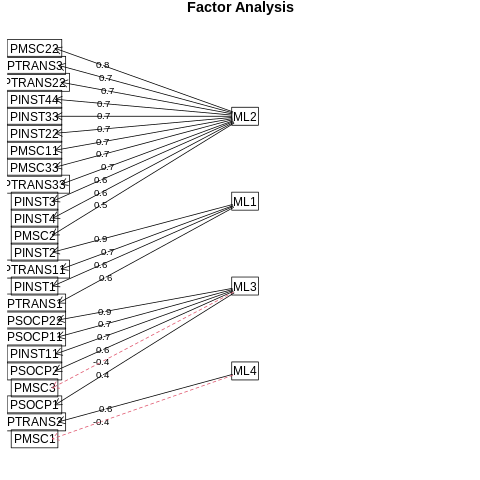

In [17]:
%%R
load("poly_model")
# Cluster analysis plot
fa.diagram(poly_model)

## Model 2. Here i change the rotation to "simplimax", results stays the same as the default setting

In [20]:
%%R
# Polychoric factor analysis
poly_model2 = fa(features, nfactor=4, cor="poly", fm="mle", rotate = "simplimax")
save(poly_model2, file = "poly_model")
poly_model2$loadings

R[write to console]: Loading required namespace: GPArotation

R[write to console]: Failed with error:  
R[write to console]: 
R[write to console]: ‘there is no package called ‘GPArotation’’
R[write to console]: 
R[write to console]: 

R[write to console]: In addition: 
R[write to console]: There were 12 warnings (use warnings() to see them)
R[write to console]: 

R[write to console]: In factor.scores, the correlation matrix is singular, an approximation is used




Loadings:
         ML2    ML1    ML3    ML4   
PINST1   -0.118  0.649 -0.202  0.412
PINST2   -0.452  0.889              
PINST3    0.591  0.394 -0.166  0.503
PINST4    0.573 -0.109 -0.397  0.375
PSOCP1   -0.207  0.386  0.410       
PSOCP2   -0.113  0.341  0.560  0.272
PTRANS1   0.529  0.599 -0.127  0.558
PTRANS2   0.439  0.593         0.604
PTRANS3   0.743        -0.375  0.438
PMSC1     0.165 -0.271 -0.105 -0.410
PMSC2     0.546  0.395 -0.272  0.374
PMSC3     0.346 -0.234 -0.444       
PINST11   0.274  0.226  0.695       
PINST22   0.694  0.669        -0.200
PINST33   0.738  0.535  0.287       
PINST44   0.741  0.236 -0.503 -0.247
PSOCP11          0.105  0.718       
PSOCP22   0.320  0.136  0.925       
PTRANS11  0.676  0.677        -0.138
PTRANS22  0.743  0.567  0.221       
PTRANS33  0.666  0.282 -0.586 -0.124
PMSC11    0.693  0.671        -0.194
PMSC22    0.753  0.542  0.245       
PMSC33    0.683  0.221 -0.566 -0.217

                 ML2   ML1   ML3   ML4
SS loadings    7.145 5.1

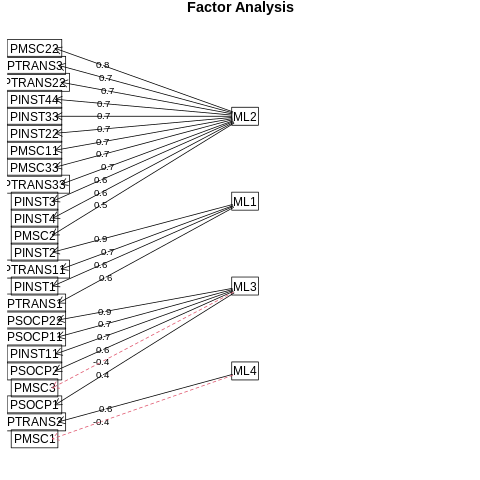

In [21]:
%%R
load("poly_model")
# Cluster analysis plot
fa.diagram(poly_model2)

## Model 3. Change the rotation to varimax, result is little different. If model 1 and 2 is consistent with your intuition. We focus on that.

In [22]:
%%R
# Polychoric factor analysis
poly_model3 = fa(features, nfactor=4, cor="poly", fm="mle", rotate = "varimax")
save(poly_model3, file = "poly_model")
poly_model3$loadings

R[write to console]: In factor.scores, the correlation matrix is singular, an approximation is used




Loadings:
         ML2    ML4    ML3    ML1   
PINST1    0.123  0.418 -0.109  0.667
PINST2    0.195 -0.100         0.973
PINST3    0.422  0.775              
PINST4    0.214  0.627 -0.291 -0.337
PSOCP1                  0.418  0.420
PSOCP2           0.147  0.593  0.370
PTRANS1   0.465  0.816         0.285
PTRANS2   0.352  0.783  0.261  0.333
PTRANS3   0.361  0.769 -0.229 -0.333
PMSC1     0.158 -0.304 -0.143 -0.378
PMSC2     0.463  0.659 -0.116       
PMSC3     0.176  0.164 -0.415 -0.377
PINST11   0.264         0.739       
PINST22   0.949  0.226         0.123
PINST33   0.795  0.301  0.441       
PINST44   0.814  0.216 -0.383 -0.251
PSOCP11                 0.721       
PSOCP22   0.177         0.968       
PTRANS11  0.913  0.273         0.150
PTRANS22  0.811  0.343  0.383       
PTRANS33  0.744  0.308 -0.459 -0.149
PMSC11    0.946  0.230         0.126
PMSC22    0.833  0.280  0.399       
PMSC33    0.761  0.225 -0.452 -0.224

                 ML2   ML4   ML3   ML1
SS loadings    7.534 4.2

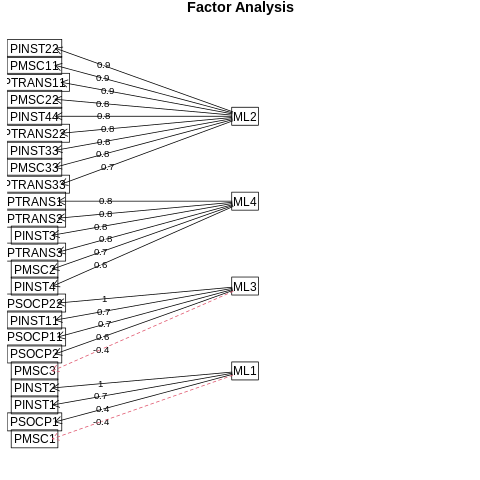

In [23]:
%%R
load("poly_model")
# Cluster analysis plot
fa.diagram(poly_model3)

## DEMOGRAPHICS

In [ ]:
import pandas as pd
demo = pd.read_csv('demo.csv')

In [ ]:
demo.head(3)

,AGE,GENDER,BUSLOCTN,TYPEOWN,NUEMPL,BUSDURATION,NATUREINDUSTRY,OWNERSQUALIF,YRSBFOWINGBUS,TYPEEMPLOYEE,...,Strongtieswithbusinessrelatedknowledgeskillsandexperienceprovide,Valuesattitudeinformationandskillsgainedfromstrongtiescontribute,Attitudeinformationandskillsgainedfromstrongtiescontributetoward,mybusinessincomehas,mybusinessprofitshave,mymarketsharehas,myreturnonincome,thenumberofemployees,productlines,@_index
0,2,1,2,1,1,2,4,4,2,3,...,3,4,4,4,4,4,4,4,3,1
1,2,1,3,1,1,3,4,4,2,3,...,4,1,4,4,4,4,4,2,2,2
2,2,2,1,1,2,3,3,4,1,2,...,4,4,5,4,5,4,2,4,3,3


In [ ]:
demo['AGE'].value_counts()

3    88
2    64
5    22
1    18
4    10
Name: AGE, dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
demo.describe()

,AGE,GENDER,BUSLOCTN,TYPEOWN,NUEMPL,BUSDURATION,NATUREINDUSTRY,OWNERSQUALIF,YRSBFOWINGBUS,TYPEEMPLOYEE,MOTMIGGH,PRMTTEAMSUPT,KPEMPLYEETASK,MOTIVATEEMPYEE,GETEMPYEEWKTGER,OVERCOMENEGTIVEEMPYEE,MNGESOLVEDIFFCTPROBLM,OPPSFINDMEANSTOGETWANT,CONFIDENTDEALEFFICIENTLYUNEXPECTEDEVENTS,STICKMYAIMSACCMPLSHGOAL,PROCLIVITYLOWRISKPROJECT,UNIMPORTNATPROCLIVITYLOWRISKPRJTS,IMPORTNATPROCLIVITYHIGHRISKPRJTS,UNIMPORTNATPROCLIVITYHIGHRISKPRJTS,Youreceiveadequatebusinessmanagementrelatedtraining,Youreceiveadequatebusinessmanagementrelatedtraining_A,Youreceiveusefultechnicalsupportfromgovernmentagencies,Youreceiveadequatecapitalforstartuporexpansionsupport,Peoplecomplywithcourtrulings,Thereisefficientlinkagebetweenresearchinstitutionsandindustry,ThereisclearandconsistenttradepolicyonsmallbusinessinGhana,Thereisanestablishedinstitutiontocoordinategovernmentsupportserv,ThereislowtaxburdenonbusinessesinGhana,Therearenodelaysintheregistrationlicensingprocesses,ThereissimplebusinessregistrationprocessesinGhana,ThereislowcostofregisteringabusinessinGhana,Inadequateskilledpersonneltoprovideexpertadvice,Inadequatefinancialinstitutiontograndloantoimmigrant,Highcostofutilitycharges,DifficultAccesstonewtechnology,Inadequatetechnicalskills,Hightaxandimportduties,Difficultyinaccessingresidencyvisapermit,Highcostofregistrationlicensing,Delaysinregistrationlicensingprocesses,Toomanyproceduresinregistrationlicensingprocesses,Idependonethnictiessocialnetworkforprivateloans,Socialnetworkprovidemewithcoethnicemployees,Socialnetworkprovidemewithcoethniccustomers,Socialnetworkprovidemewithcoethnicsuppliers,Strongtieswithbusinessrelatedknowledgeskillsandexperienceprovide,Valuesattitudeinformationandskillsgainedfromstrongtiescontribute,Attitudeinformationandskillsgainedfromstrongtiescontributetoward,mybusinessincomehas,mybusinessprofitshave,mymarketsharehas,myreturnonincome,thenumberofemployees,productlines,@_index
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.00000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.00000,202.000000,202.000000
mean,2.772277,1.351485,2.267327,2.569307,1.930693,2.732673,3.029703,3.569307,2.108911,2.717822,2.103960,4.108911,4.732673,4.405941,4.599010,4.346535,4.559406,4.396040,4.490099,3.846535,3.841584,2.742574,3.638614,2.470297,2.054455,2.326733,2.158416,2.089109,4.108911,2.400990,2.579208,3.009901,2.064356,2.19802,2.287129,3.128713,2.762376,2.361386,1.905941,2.742574,2.673267,1.316832,2.559406,2.896040,2.099010,2.168317,3.856436,4.009901,4.212871,3.940594,4.019802,3.905941,4.103960,3.881188,3.886139,3.668317,3.801980,3.50495,3.247525,101.500000
std,1.054544,0.478620,1.399297,1.348538,1.199149,0.506497,0.913747,1.001317,0.667676,0.602300,0.958899,1.318834,0.588295,0.700792,0.830153,0.682921,0.497692,0.490288,0.632771,0.962590,0.610565,0.888326,0.859882,0.655333,0.459293,0.853543,0.749563,0.727553,0.312301,1.093899,0.873127,0.834517,1.017663,0.88120,0.906984,0.953270,0.865577,0.812278,0.750499,0.663977,0.706880,0.580456,0.945761,0.439453,0.630958,0.920408,0.854711,0.951511,0.410354,0.453220,0.545998,0.890002,0.672179,0.569317,0.754361,0.664588,0.712641,0.98873,0.745213,58.456537
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,3.000000,4.000000,4.000000,3.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,1.00000,1.000000,2.000000,2.000000,1.00000

# CFA

In [24]:
%%R
install.packages("lavaan")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘pbivnorm’, ‘numDeriv’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pbivnorm_0.6.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 8594 bytes

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [25]:
%%R
library(lavaan)

R[write to console]: This is lavaan 0.6-7

R[write to console]: lavaan is BETA software! Please report any bugs.

R[write to console]: 
Attaching package: ‘lavaan’


R[write to console]: The following object is masked from ‘package:psych’:

    cor2cov




## DATA

In [27]:
%%R
dat = read.csv('dave_final.csv')

In [28]:
%%R
head(dat)

  X PINST1 PINST2 PINST3 PINST4 PSOCP1 PSOCP2 PTRANS1 PTRANS2 PTRANS3 PMSC1
1 0      4      4      5      5      3      4       5       5       5     4
2 1      3      4      1      4      4      4       3       2       3     4
3 2      4      4      5      4      4      5       5       5       5     3
4 3      4      4      5      5      5      4       5       5       5     2
5 4      4      4      4      4      4      5       5       5       4     2
6 5      3      4      4      4      4      4       5       5       5     4
  PMSC2 PMSC3 PINST11 PINST22 PINST33 PINST44 PSOCP11 PSOCP22 PTRANS11 PTRANS22
1     5     5       4       5       5       5       3       4        5        5
2     3     5       4       4       5       4       4       4        3        2
3     5     5       5       5       5       5       4       5        5        5
4     5     5       4       5       5       5       5       4        5        5
5     4     4       5       5       5       4       4       5       

### Check assumptions

Note that because CFAs (and all SEM models) are based on the covariances among variances, they are susceptible to the effects of violations to the assumption of normality (especially skew and outliers), which can strongly affect covariances. Before running your model, you should examine your variables to check that there are no serious deviations from normality. 

In [29]:
%%R
install.packages("MVN")
library(MVN)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘locfit’, ‘ash’, ‘FNN’, ‘multicool’, ‘hdrcde’, ‘ks’, ‘bitops’, ‘zoo’, ‘rainbow’, ‘RCurl’, ‘modeltools’, ‘lmtest’, ‘fds’, ‘mvtnorm’, ‘pcaPP’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘reshape’, ‘vcd’, ‘laeken’, ‘ranger’, ‘NADA’, ‘truncnorm’, ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘pls’, ‘data.table’, ‘cvTools’, ‘e1071’, ‘fda’, ‘rrcov’, ‘fpc’, ‘GGally’, ‘kernlab’, ‘mclust’, ‘sROC’, ‘VIM’, ‘zCompositions’, ‘reshape2’, ‘RcppEigen’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘DEoptimR’, ‘sgeostat’, ‘robCompositions’, ‘webshot’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘nortest’, ‘moments’, ‘robustbase’, ‘mvoutlier’, ‘plyr’, ‘energy’, ‘kableExtra’, ‘car’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/locfit_1.5-9.4.tar.gz'

R[write to console]: Co

In [31]:
%%R
uniPlot(dat, type = "histogram")

R[write to console]: Error in uniPlot(dat, type = "histogram") : 
  could not find function "uniPlot"
Calls: <Anonymous> -> <Anonymous> -> withVisible

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate,  :
R[write to console]: 
 
R[write to console]:  I am sorry, to do these rotations requires the GPArotation package to be installed

R[write to console]: 2: 
R[write to console]: In cor.smooth(r) :
R[write to console]:  Matrix was not positive definite, smoothing was done

R[write to console]: 3: 
R[write to console]: In polychoric(r, correct = correct, weight = weight) :
R[write to console]: 
 
R[write to console]:  The items do not have an equal number of response alternatives, global set to FALSE.

R[write to console]: 4: 
R[write to console]: In matpLower(x, nvar, gminx, gmaxx, gminy, gmaxy) :
R[write to console]: 
 
R[write to console]:  213 cells


Error in uniPlot(dat, type = "histogram") : 
  could not find function "uniPlot"
Calls: <Anonymous> -> <Anonymous> -> withVisible


## Specifying a CFA model

In [33]:
%%R
HS.model <- ' f2  =~ PMSC22 + PTRANS22 + PTRANS3 + PINST44 + PINST33 + PINST22 + PMSC11 + PMSC33 + PTRANS11 + PTRANS33 + PINST3 + PINST4 + PMSC2
              f1 =~ PINST2 + PINST1 + PTRANS1
              f3 =~ PSOCP22 + PSOCP11 + PINST11 + PSOCP2
              f4   =~ PTRANS2 '

# factors are f2, f1, f3 and f4. Each equation specify the variables that loads onto each factor

In [34]:
%%R
fit <- cfa(HS.model, data=dat, 
           std.lv=TRUE, ordered=c("PMSC22", "PTRANS22", "PTRANS3", "PINST44", "PINST33", "PINST22", "PMSC11", "PMSC33", "PTRANS11", "PTRANS33", "PINST3", "PINST4", "PMSC2",
"PINST2", "PINST1", "PTRANS1", "PSOCP22", "PSOCP11", "PINST11", "PSOCP2"))

In [35]:
%%R
fit

lavaan 0.6-7 ended normally after 72 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                         66
                                                      
  Number of observations                           200
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                              2347.780     981.221
  Degrees of freedom                               184         184
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  2.762
  Shift parameter                                          131.057
       simple second-order correction                             


In [36]:
%%R
install.packages("knitr")
library(knitr)
options(knitr.kable.NA = '') # this will hide missing values in the kable table

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/knitr_1.30.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 887652 bytes (866 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write t

In [37]:
%%R
summary(fit, fit.measures=TRUE, standardized=TRUE)

lavaan 0.6-7 ended normally after 72 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                         66
                                                      
  Number of observations                           200
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                              2347.780     981.221
  Degrees of freedom                               184         184
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  2.762
  Shift parameter                                          131.057
       simple second-order correction                             

Model Test Baseline Model:

  Test statistic                            442896.355  113508.399
  Degrees of freedom             

## Parameter Estimates

In [38]:
%%R
parameterEstimates(fit, standardized=TRUE)

         lhs  op      rhs    est    se       z pvalue ci.lower ci.upper std.lv
1         f2  =~   PMSC22  0.974 0.007 132.340  0.000    0.960    0.989  0.974
2         f2  =~ PTRANS22  0.991 0.003 347.324  0.000    0.985    0.996  0.991
3         f2  =~  PTRANS3  0.746 0.032  23.029  0.000    0.683    0.810  0.746
4         f2  =~  PINST44  0.909 0.014  64.671  0.000    0.881    0.936  0.909
5         f2  =~  PINST33  0.929 0.015  61.657  0.000    0.900    0.959  0.929
6         f2  =~  PINST22  0.998 0.001 700.564  0.000    0.995    1.000  0.998
7         f2  =~   PMSC11  0.998 0.001 697.871  0.000    0.995    1.001  0.998
8         f2  =~   PMSC33  0.904 0.014  62.705  0.000    0.876    0.932  0.904
9         f2  =~ PTRANS11  0.990 0.004 235.195  0.000    0.982    0.999  0.990
10        f2  =~ PTRANS33  0.908 0.016  58.217  0.000    0.877    0.939  0.908
11        f2  =~   PINST3  0.992 0.004 260.029  0.000    0.984    0.999  0.992
12        f2  =~   PINST4  0.533 0.066   8.046  0.00

In [39]:
%%R
library(dplyr) 
library(tidyr)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [40]:
%%R
parameterEstimates(fit, standardized=TRUE) %>% 
  filter(op == "=~") %>% 
  select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>% 
  kable(digits = 3, format="pandoc", caption="Factor Loadings")



Table: Factor Loadings

Latent Factor   Indicator         B      SE         Z   p-value     Beta
--------------  ----------  -------  ------  --------  --------  -------
f2              PMSC22        0.974   0.007   132.340     0.000    0.974
f2              PTRANS22      0.991   0.003   347.324     0.000    0.991
f2              PTRANS3       0.746   0.032    23.029     0.000    0.746
f2              PINST44       0.909   0.014    64.671     0.000    0.909
f2              PINST33       0.929   0.015    61.657     0.000    0.929
f2              PINST22       0.998   0.001   700.564     0.000    0.998
f2              PMSC11        0.998   0.001   697.871     0.000    0.998
f2              PMSC33        0.904   0.014    62.705     0.000    0.904
f2              PTRANS11      0.990   0.004   235.195     0.000    0.990
f2              PTRANS33      0.908   0.016    58.217     0.000    0.908
f2              PINST3        0.992   0.004   260.029     0.000    0.992
f2              PINST4   

In [42]:
%%R
lavResiduals(fit)

$type
[1] "cor.bentler"

$cov
         PMSC22 PTRANS22 PTRANS3 PINST44 PINST33 PINST22 PMSC11 PMSC33 PTRANS11
PMSC22    0.000                                                                
PTRANS22 -0.019  0.000                                                         
PTRANS3  -0.306 -0.247    0.000                                                
PINST44  -0.199 -0.267    0.008   0.000                                        
PINST33   0.050  0.022   -0.284  -0.251   0.000                                
PINST22   0.012 -0.027   -0.256  -0.006  -0.004   0.000                        
PMSC11    0.012 -0.027   -0.256  -0.056   0.011   0.002   0.000                
PMSC33   -0.236 -0.363    0.025   0.091  -0.286  -0.090  -0.091  0.000         
PTRANS11 -0.045  0.018   -0.208  -0.090  -0.008  -0.013  -0.014 -0.183  0.000  
PTRANS33 -0.317 -0.230    0.094   0.077  -0.296  -0.081  -0.081  0.090 -0.032  
PINST3   -0.316 -0.266    0.051  -0.413  -0.282  -0.359  -0.359 -0.435 -0.308  
PINST4   -

In [44]:
%%R
lavTables(fit)

      id      lhs      rhs nobs row col obs.freq obs.prop est.prop           X2
1      1   PMSC22 PTRANS22  200   1   1       11    0.055    0.049        0.127
2      1   PMSC22 PTRANS22  200   2   1        0    0.000    0.026        5.102
3      1   PMSC22 PTRANS22  200   3   1        4    0.020    0.000      885.015
4      1   PMSC22 PTRANS22  200   1   2        0    0.000    0.006        1.119
5      1   PMSC22 PTRANS22  200   2   2       34    0.170    0.121        3.968
6      1   PMSC22 PTRANS22  200   3   2        0    0.000    0.043        8.680
7      1   PMSC22 PTRANS22  200   1   3        0    0.000    0.000        0.001
8      1   PMSC22 PTRANS22  200   2   3        0    0.000    0.023        4.697
9      1   PMSC22 PTRANS22  200   3   3      151    0.755    0.732        0.151
10     2   PMSC22  PTRANS3  200   1   1        5    0.025    0.036        0.660
11     2   PMSC22  PTRANS3  200   2   1        6    0.030    0.051        1.759
12     2   PMSC22  PTRANS3  200   3   1 

In [45]:
%%R
fitMeasures(fit)

                         npar                          fmin 
                       66.000                         5.869 
                        chisq                            df 
                     2347.780                       184.000 
                       pvalue                  chisq.scaled 
                        0.000                       981.221 
                    df.scaled                 pvalue.scaled 
                      184.000                         0.000 
         chisq.scaling.factor                baseline.chisq 
                        2.762                    442896.355 
                  baseline.df               baseline.pvalue 
                      210.000                         0.000 
        baseline.chisq.scaled            baseline.df.scaled 
                   113508.399                       210.000 
       baseline.pvalue.scaled baseline.chisq.scaling.factor 
                        0.000                         3.907 
                        

dem65 ~ ind60 + dem60

In [46]:
%%R
dat

      X PINST1 PINST2 PINST3 PINST4 PSOCP1 PSOCP2 PTRANS1 PTRANS2 PTRANS3 PMSC1
1     0      4      4      5      5      3      4       5       5       5     4
2     1      3      4      1      4      4      4       3       2       3     4
3     2      4      4      5      4      4      5       5       5       5     3
4     3      4      4      5      5      5      4       5       5       5     2
5     4      4      4      4      4      4      5       5       5       4     2
6     5      3      4      4      4      4      4       5       5       5     4
7     6      4      4      4      4      3      2       5       4       5     3
8     7      4      4      4      4      4      4       5       5       4     3
9     8      4      4      4      4      4      4       5       5       5     4
10    9      5      5      4      4      4      4       5       5       4     3
11   10      4      5      5      4      4      4       5       5       4     2
12   11      4      5      4      4     

In [48]:
%%R
HS.model <- ' f2  =~ PMSC22 + PTRANS22 + PTRANS3 + PINST44 + PINST33 + PINST22 + PMSC11 + PMSC33 + PTRANS11 + PTRANS33 + PINST3 + PINST4 + PMSC2
              f1 =~ PINST2 + PINST1 + PTRANS1
              f3 =~ PSOCP22 + PSOCP11 + PINST11 + PSOCP2
              f4   =~ PTRANS2 

              myreturnonincome ~ f1 + f2 + f3 + f4 '

# factors are f2, f1, f3 and f4. Each equation specify the variables that loads onto each factor

In [49]:
%%R
fit <- cfa(HS.model, data=dat, 
           std.lv=TRUE, ordered=c("PMSC22", "PTRANS22", "PTRANS3", "PINST44", "PINST33", "PINST22", "PMSC11", "PMSC33", "PTRANS11", "PTRANS33", "PINST3", "PINST4", "PMSC2",
"PINST2", "PINST1", "PTRANS1", "PSOCP22", "PSOCP11", "PINST11", "PSOCP2", "myreturnonincome"))

In [50]:
%%R
summary(fit, fit.measures=TRUE, standardized=TRUE)

lavaan 0.6-7 ended normally after 82 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                         72
                                                      
  Number of observations                           200
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                              2606.828    1100.748
  Degrees of freedom                               201         201
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  2.723
  Shift parameter                                          143.307
       simple second-order correction                             

Model Test Baseline Model:

  Test statistic                            443620.799  113426.841
  Degrees of freedom             

In [63]:
%%R
install.packages("semTools")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/semTools_0.5-3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1361885 bytes (1.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [64]:
%%R
library(semTools)

In [65]:
%%R
reliability(fit, dropSingle = FALSE)

R[write to console]: Error in ly[[i]] %*% ve[[i]] : non-conformable arguments
Calls: <Anonymous> -> <Anonymous> -> withVisible -> reliability

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In (apply(ly[[i]], 2, sum)^2) * diag(ve[[i]]) :
R[write to console]: 
 
R[write to console]:  longer object length is not a multiple of shorter object length




Error in ly[[i]] %*% ve[[i]] : non-conformable arguments
Calls: <Anonymous> -> <Anonymous> -> withVisible -> reliability


In [56]:
%%R
sl <- standardizedSolution(fit)
sl <- sl$est.std[sl$op == "=~"]

In [57]:
%%R
re <- 1 - sl^2
sum(sl)^2 / (sum(sl)^2 + sum(re))

[1] 0.9854204


In [58]:
%%R
sl

 [1]  0.9741030  0.9906662  0.7469130  0.9091460  0.9293481  0.9975472
 [7]  0.9978827  0.9050531  0.9901962  0.9094123  0.9917185  0.4750246
[13]  0.9926176 -0.1620653  0.5831418  1.3045379  1.1301053  0.4642548
[19]  0.7299460  0.6263008  1.0000000


In [67]:
%%R
HS.model <- ' f2  =~ PMSC22 + PTRANS22 + PTRANS3 + PINST44 + PINST33 + PINST22 + PMSC11 + PMSC33 + PTRANS11 + PTRANS33 + PINST3 + PINST4 + PMSC2
              f1 =~ PINST2 + PINST1 + PTRANS1
              f3 =~ PSOCP22 + PSOCP11 + PINST11 + PSOCP2
              f4   =~ PTRANS2 

              mymarketsharehas ~ f1 + f2 + f3 + f4 '

# factors are f2, f1, f3 and f4. Each equation specify the variables that loads onto each factor


In [69]:
%%R
fit <- cfa(HS.model, data=dat, 
           std.lv=TRUE, ordered=c("PMSC22", "PTRANS22", "PTRANS3", "PINST44", "PINST33", "PINST22", "PMSC11", "PMSC33", "PTRANS11", "PTRANS33", "PINST3", "PINST4", "PMSC2",
"PINST2", "PINST1", "PTRANS1", "PSOCP22", "PSOCP11", "PINST11", "PSOCP2", "mymarketsharehas"))


In [70]:
%%R
summary(fit, fit.measures=TRUE, standardized=TRUE)

lavaan 0.6-7 ended normally after 93 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                         73
                                                      
  Number of observations                           200
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                              2719.118    1122.793
  Degrees of freedom                               201         201
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  2.774
  Shift parameter                                          142.645
       simple second-order correction                             

Model Test Baseline Model:

  Test statistic                            443422.918  114525.445
  Degrees of freedom             

In [71]:
%%R
HS.model <- ' f2  =~ PMSC22 + PTRANS22 + PTRANS3 + PINST44 + PINST33 + PINST22 + PMSC11 + PMSC33 + PTRANS11 + PTRANS33 + PINST3 + PINST4 + PMSC2
              f1 =~ PINST2 + PINST1 + PTRANS1
              f3 =~ PSOCP22 + PSOCP11 + PINST11 + PSOCP2
              f4   =~ PTRANS2 

              mybusinessprofitshave ~ f1 + f2 + f3 + f4 '

# factors are f2, f1, f3 and f4. Each equation specify the variables that loads onto each factor

In [72]:
%%R
fit <- cfa(HS.model, data=dat, 
           std.lv=TRUE, ordered=c("PMSC22", "PTRANS22", "PTRANS3", "PINST44", "PINST33", "PINST22", "PMSC11", "PMSC33", "PTRANS11", "PTRANS33", "PINST3", "PINST4", "PMSC2",
"PINST2", "PINST1", "PTRANS1", "PSOCP22", "PSOCP11", "PINST11", "PSOCP2", "mybusinessprofitshave"))

In [73]:
%%R
summary(fit, fit.measures=TRUE, standardized=TRUE)

lavaan 0.6-7 ended normally after 114 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                         73
                                                      
  Number of observations                           200
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                              2398.271    1001.057
  Degrees of freedom                               201         201
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  2.796
  Shift parameter                                          143.298
       simple second-order correction                             

Model Test Baseline Model:

  Test statistic                            443087.414  114113.105
  Degrees of freedom            

In [74]:
%%R
HS.model <- ' f2  =~ PMSC22 + PTRANS22 + PTRANS3 + PINST44 + PINST33 + PINST22 + PMSC11 + PMSC33 + PTRANS11 + PTRANS33 + PINST3 + PINST4 + PMSC2
              f1 =~ PINST2 + PINST1 + PTRANS1
              f3 =~ PSOCP22 + PSOCP11 + PINST11 + PSOCP2
              f4   =~ PTRANS2 

              mybusinessincomehas ~ f1 + f2 + f3 + f4 '

# factors are f2, f1, f3 and f4. Each equation specify the variables that loads onto each factor

In [75]:
%%R
fit <- cfa(HS.model, data=dat, 
           std.lv=TRUE, ordered=c("PMSC22", "PTRANS22", "PTRANS3", "PINST44", "PINST33", "PINST22", "PMSC11", "PMSC33", "PTRANS11", "PTRANS33", "PINST3", "PINST4", "PMSC2",
"PINST2", "PINST1", "PTRANS1", "PSOCP22", "PSOCP11", "PINST11", "PSOCP2", "mybusinessincomehas"))

In [76]:
%%R
summary(fit, fit.measures=TRUE, standardized=TRUE)


lavaan 0.6-7 ended normally after 90 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                         73
                                                      
  Number of observations                           200
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                              3041.067    1249.988
  Degrees of freedom                               201         201
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  2.747
  Shift parameter                                          143.126
       simple second-order correction                             

Model Test Baseline Model:

  Test statistic                            443930.213  113416.670
  Degrees of freedom             

In [80]:
%%R
HS.model <- ' f2  =~ PMSC22 + PTRANS22 + PTRANS3 + PINST44 + PINST33 + PINST22 + PMSC11 + PMSC33 + PTRANS11 + PTRANS33 + PINST3 + PINST4 + PMSC2
              f1 =~ PINST2 + PINST1 + PTRANS1
              f3 =~ PSOCP22 + PSOCP11 + PINST11 + PSOCP2
              f4   =~ PTRANS2 

             thenumberofemployees ~ f1 + f2 + f3 + f4 '

# factors are f2, f1, f3 and f4. Each equation specify the variables that loads onto each factor


In [81]:
%%R
fit <- cfa(HS.model, data=dat, 
           std.lv=TRUE, ordered=c("PMSC22", "PTRANS22", "PTRANS3", "PINST44", "PINST33", "PINST22", "PMSC11", "PMSC33", "PTRANS11", "PTRANS33", "PINST3", "PINST4", "PMSC2",
"PINST2", "PINST1", "PTRANS1", "PSOCP22", "PSOCP11", "PINST11", "PSOCP2", "thenumberofemployees"))

In [82]:
%%R
summary(fit, fit.measures=TRUE, standardized=TRUE)

lavaan 0.6-7 ended normally after 126 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                         74
                                                      
  Number of observations                           200
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                              2665.424    1090.530
  Degrees of freedom                               201         201
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  2.816
  Shift parameter                                          144.140
       simple second-order correction                             

Model Test Baseline Model:

  Test statistic                            444034.352  112152.778
  Degrees of freedom            

In [107]:
%%R
HS.model <- ' f2  =~ PMSC22 + PTRANS22 + PTRANS3 + PINST44 + PINST33 + PINST22 + PMSC11 + PMSC33 + PTRANS11 + PTRANS33 + PINST3 + PINST4 + PMSC2
              f1 =~ PINST2 + PINST1 + PTRANS1
              f3 =~ PSOCP22 + PSOCP11 + PINST11 + PSOCP2
              f4   =~ PTRANS2 
	            f5 =~ mybusinessincomehas + myreturnonincome 

              f5 ~ f1 + f2 + f3 + f4 '

# factors are f2, f1, f3 and f4. Each equation specify the variables that loads onto each factor

In [108]:
%%R
fit <- cfa(HS.model, data=dat, 
           std.lv=TRUE, ordered=c("PMSC22", "PTRANS22", "PTRANS3", "PINST44", "PINST33", "PINST22", "PMSC11", "PMSC33", "PTRANS11", "PTRANS33", "PINST3", "PINST4", "PMSC2",
"PINST2", "PINST1", "PTRANS1", "PSOCP22", "PSOCP11", "PINST11", "PSOCP2", "mybusinessincomehas", "mybusinessprofitshave", "mymarketsharehas", "myreturnonincome", "thenumberofemployees"))

In [109]:
%%R
summary(fit, fit.measures=TRUE, standardized=TRUE)

lavaan 0.6-7 ended normally after 91 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                         77
                                                      
  Number of observations                           200
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                              3418.381    1416.424
  Degrees of freedom                               221         221
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  2.717
  Shift parameter                                          158.217
       simple second-order correction                             

Model Test Baseline Model:

  Test statistic                            446257.248  112030.670
  Degrees of freedom             

In [110]:
%%R
HS.model <- ' f2  =~ PMSC22 + PTRANS22 + PTRANS3 + PINST44 + PINST33 + PINST22 + PMSC11 + PMSC33 + PTRANS11 + PTRANS33 + PINST3 + PINST4 + PMSC2
              f1 =~ PINST2 + PINST1 + PTRANS1
              f3 =~ PSOCP22 + PSOCP11 + PINST11 + PSOCP2
              f4   =~ PTRANS2 
	            f5 =~ mybusinessincomehas + myreturnonincome + mymarketsharehas

              f5 ~ f1 + f2 + f3 + f4 '

# factors are f2, f1, f3 and f4. Each equation specify the variables that loads onto each factor

In [111]:
%%R
fit <- cfa(HS.model, data=dat, 
           std.lv=TRUE, ordered=c("PMSC22", "PTRANS22", "PTRANS3", "PINST44", "PINST33", "PINST22", "PMSC11", "PMSC33", "PTRANS11", "PTRANS33", "PINST3", "PINST4", "PMSC2",
"PINST2", "PINST1", "PTRANS1", "PSOCP22", "PSOCP11", "PINST11", "PSOCP2", "mybusinessincomehas", "mybusinessprofitshave", "mymarketsharehas", "myreturnonincome", "thenumberofemployees"))

In [112]:
%%R
summary(fit, fit.measures=TRUE, standardized=TRUE)

lavaan 0.6-7 ended normally after 86 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                         81
                                                      
  Number of observations                           200
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                              3945.818    1592.465
  Degrees of freedom                               243         243
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  2.781
  Shift parameter                                          173.537
       simple second-order correction                             

Model Test Baseline Model:

  Test statistic                            447756.030  112642.752
  Degrees of freedom             